## Decoding an 8x8 Block using DCT
We will decode and encode a 8x8 pixel block of greyscale values using the 2-dimensional discrete cosine transformation. This is a lookup notebook for a speech about data compression I gave 2018 at University Leipzig. 

In [1]:
from scipy.fftpack import dct, idct
import numpy as np 
from matplotlib import pyplot
from math import sqrt

def apply(function, matrix):
    """
    apply a fct on all entries of a matrix
    """
    return np.array([ [function(val) for val in l] for l in matrix])

### We want to decode the an 8x8 pixel block with the following greyscale values.

In [2]:
grey_vals = np.array([
     [52, 55, 61, 66, 70, 61, 64, 73],
     [63, 59, 55, 90, 109, 85, 69, 72],
     [62, 59, 68, 113, 144, 104, 66, 73],
     [63, 58, 71, 122, 154, 106, 70, 69],
     [67, 61, 68, 104, 126, 88, 68, 70],
     [79, 65, 60, 70, 77, 68, 58, 75],
     [85, 71, 64, 59, 55, 61, 65, 83],
     [87, 79, 69, 68, 65, 76, 78, 94]])

dim = len(grey_vals)

#### plotting:

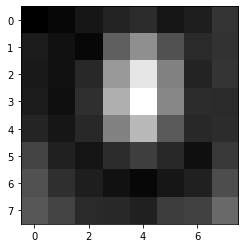

In [3]:
im = pyplot.imshow(X = grey_vals, cmap='gray')

### Shift the greyscale from [0, 255] to [-128, 127].

In [4]:
shifted = apply(lambda x: x-128, grey_vals)
shifted

array([[-76, -73, -67, -62, -58, -67, -64, -55],
       [-65, -69, -73, -38, -19, -43, -59, -56],
       [-66, -69, -60, -15,  16, -24, -62, -55],
       [-65, -70, -57,  -6,  26, -22, -58, -59],
       [-61, -67, -60, -24,  -2, -40, -60, -58],
       [-49, -63, -68, -58, -51, -60, -70, -53],
       [-43, -57, -64, -69, -73, -67, -63, -45],
       [-41, -49, -59, -60, -63, -52, -50, -34]])

### 2-dim Dicrete Cosine Transformation (DCT)
Decompose the image in its frequencies using the 2-dim DCT

In [5]:
# 2-dim dct
dct_mtx = dct(x=dct(x=shifted.T, type=2).T, type= 2)

# standartization
dct_mtx = apply(lambda x: x/(8*2*sqrt(2)), dct_mtx)
for i in range(dim):
    dct_mtx[i][i] = dct_mtx[i][i] / sqrt(2)
    
apply(lambda x: int(x), dct_mtx)

### Quantization
We dived the matrix, which represents the frequencies --dct_mtx-- with a quantization matrix, and afterward, we will round every entry of the resulting matrix down. Hence, by the shape of the quantization matrix, the matrix entries that correspond to the higher frequencies are likely to be zero. Remark that the rounding is the lossy part of the decoding. 

In [6]:
# quantization matrix
Q = np.array([
    [ 16, 11, 10, 16, 24, 40, 51, 61],
    [ 12, 12, 14 ,19, 26, 58, 60, 55],
    [ 14, 13, 16, 24, 40, 57, 69, 56],
    [ 14, 17, 22, 29, 51, 87, 80, 62],
    [ 18, 22, 37, 56, 68,109,103, 77],
    [ 24, 35, 55, 64, 81,104,113, 92],
    [ 49, 64, 78, 87,103,121,120,101],
    [ 72, 92, 95, 98,112,100,103, 99]])

# devide every enty of G by the corresponding entry of Q 
for i in range(dim):
    for k in range(dim):
        dct_mtx[i][k] = dct_mtx[i][k]/Q[i][k]
        
# and round every entry down 
decoded_mtx = apply(round, dct_mtx)
decoded_mtx = apply(lambda x: int(x), decoded_mtx)
decoded_mtx

array([[-831,  -62, -138,   39,   53,  -11,   -1,    0],
       [   8,  -29,  -69,    9,    8,   -2,   -2,    1],
       [ -76,    9,   77,  -16,  -12,    3,    1,   -2],
       [ -78,   11,   25,   -8,   -3,    1,    0,    1],
       [  15,   -5,   -6,   -1,    0,    0,    0,    1],
       [  -7,    1,    1,   -1,    0,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    0,    0,   -1,    0,    0,    0,    0]])

## Done!
Well, more or less. One may now obtain that most non-zero values are in the upper left triangle. Hence, one can decode this matrix efficiently. For instance by storing all non-zero entries in a triangle que, i.e., 
[-26, -3, 0, -3, -1, -6, 2, -3, 0, -3, ...].

## Encoding
A rollback of the transformations gives us a similar image.

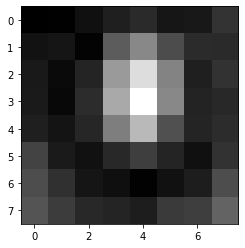

In [16]:
mtx = idct(x=idct(x=decoded_mtx.T, type=2).T, type= 2)
im_back = pyplot.imshow(X = mtx, cmap='gray')